# Introduction

This is a notebook dealing with the following Kaggle Challenge:
[Tabular Playground Series - Mar 2021](https://www.kaggle.com/c/tabular-playground-series-mar-2021)

I have used the Random Forest estimator as a model. The overall Kaggle score is 0.77836.

# Imports

In [1]:
## DF AND VISUALIZATION
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## ML TOOLS
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn import set_config
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import precision_recall_curve

from joblib import dump, load

# Data

In [2]:
df = pd.read_csv("../raw_data/train.csv")

## Dataset inspection

In [3]:
### CHANGE ID TO INDEX
df = df.set_index("id")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300000 entries, 0 to 499999
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   cat0    300000 non-null  object 
 1   cat1    300000 non-null  object 
 2   cat2    300000 non-null  object 
 3   cat3    300000 non-null  object 
 4   cat4    300000 non-null  object 
 5   cat5    300000 non-null  object 
 6   cat6    300000 non-null  object 
 7   cat7    300000 non-null  object 
 8   cat8    300000 non-null  object 
 9   cat9    300000 non-null  object 
 10  cat10   300000 non-null  object 
 11  cat11   300000 non-null  object 
 12  cat12   300000 non-null  object 
 13  cat13   300000 non-null  object 
 14  cat14   300000 non-null  object 
 15  cat15   300000 non-null  object 
 16  cat16   300000 non-null  object 
 17  cat17   300000 non-null  object 
 18  cat18   300000 non-null  object 
 19  cont0   300000 non-null  float64
 20  cont1   300000 non-null  float64
 21  cont2   30

In [5]:
### DIVIDE COLUMNS BY TYPE
col_cat = list(df.select_dtypes(exclude=['float64', 'int64']).columns)
col_num = list(df.select_dtypes(include=['float64', 'int64']).columns)
print(f"categorical Columns: {col_cat}")
print(f"Numerical Columns: {col_num}")
df.head()

categorical Columns: ['cat0', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8', 'cat9', 'cat10', 'cat11', 'cat12', 'cat13', 'cat14', 'cat15', 'cat16', 'cat17', 'cat18']
Numerical Columns: ['cont0', 'cont1', 'cont2', 'cont3', 'cont4', 'cont5', 'cont6', 'cont7', 'cont8', 'cont9', 'cont10', 'target']


,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,target
id,,,,,,,,,,,,,,,,,,,,,
0,A,I,A,B,B,BI,A,S,Q,A,...,0.759439,0.795549,0.681917,0.621672,0.592184,0.791921,0.815254,0.965006,0.665915,0
1,A,I,A,A,E,BI,K,W,AD,F,...,0.386385,0.541366,0.388982,0.357778,0.600044,0.408701,0.399353,0.927406,0.493729,0
2,A,K,A,A,E,BI,A,E,BM,L,...,0.343255,0.616352,0.793687,0.552877,0.352113,0.388835,0.412303,0.292696,0.549452,0
3,A,K,A,C,E,BI,A,Y,AD,F,...,0.831147,0.807807,0.800032,0.619147,0.221789,0.897617,0.633669,0.760318,0.934242,0
4,A,I,G,B,E,BI,C,G,Q,A,...,0.338818,0.277308,0.610578,0.128291,0.578764,0.279167,0.351103,0.357084,0.328960,1


In [6]:
print(f"Shape of Dataset: {df.shape}")
df.describe()

Shape of Dataset: (300000, 31)


,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,target
count,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000
mean,0.504749,0.494073,0.516632,0.474235,0.504848,0.502257,0.488229,0.501739,0.488074,0.469496,0.508230,0.264870
std,0.206788,0.213037,0.214851,0.216636,0.227474,0.241243,0.211335,0.203496,0.179048,0.194516,0.203393,0.441265
min,-0.049562,0.084480,0.094493,-0.045316,0.168071,-0.036379,0.005199,0.090901,0.024139,0.214866,0.097789,0.000000
25%,0.344985,0.317363,0.326047,0.292249,0.279303,0.276442,0.323914,0.353054,0.358915,0.309934,0.368312,0.000000
50%,0.479650,0.463170,0.471247,0.387564,0.479858,0.554768,0.518089,0.435404,0.410908,0.407477,0.446576,0.000000
75%,0.637657,0.693992,0.704625,0.644950,0.725779,0.735225,0.608537,0.642023,0.612725,0.586793,0.581957,1.000000
max,1.004559,1.009958,1.016600,0.952187,0.858578,0.853022,0.966553,1.035818,1.055885,1.005652,1.011331,1.000000


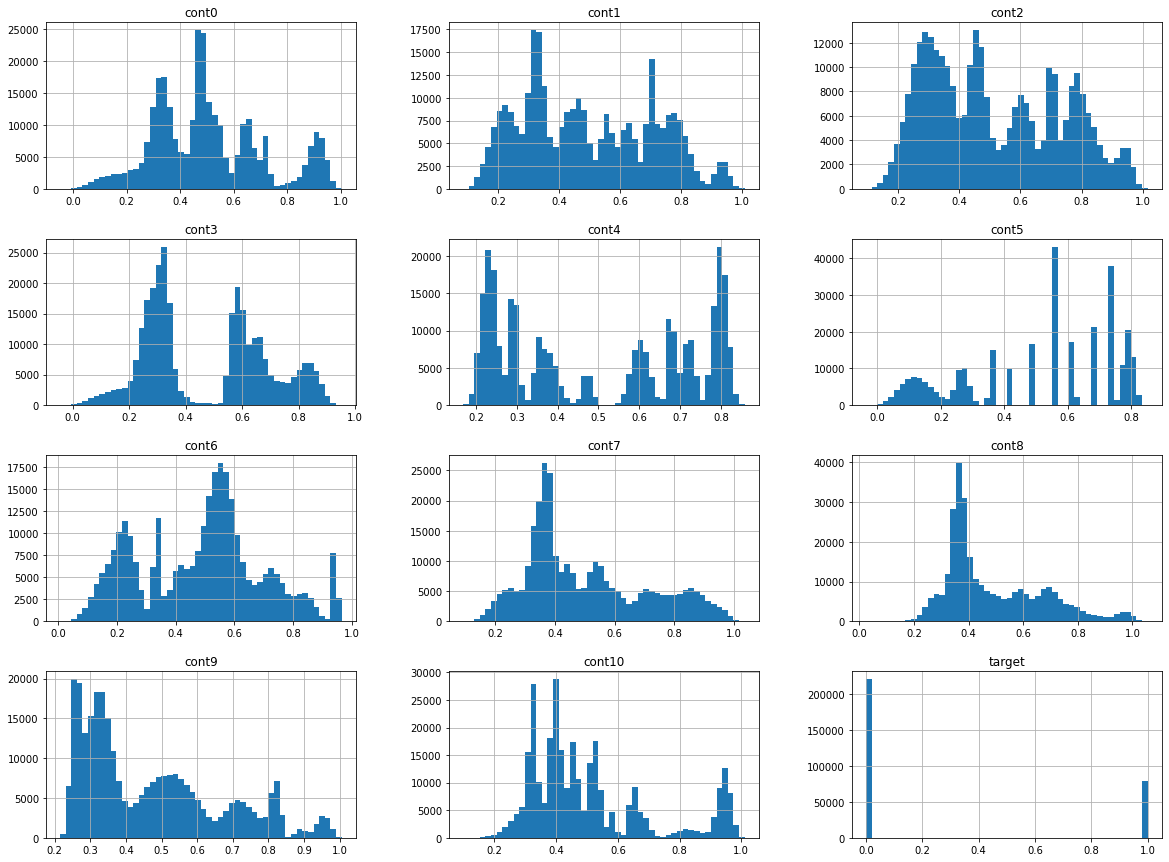

In [7]:
### DATA INSPECTION OF NUMERICAL FEATURES
df.hist(bins=50, figsize=(20,15))
plt.show()

(array([220539.,  79461.]),
 array([0. , 0.5, 1. ]),
 <BarContainer object of 2 artists>)

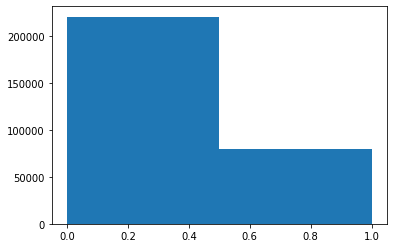

In [8]:
### Inspection of Target
plt.hist(df.target, bins=2)
## TARGET IS UNBALANCED

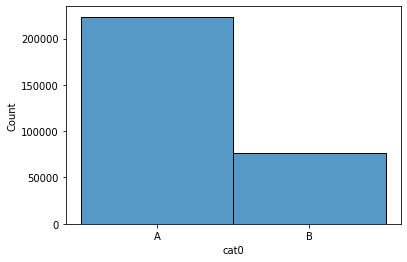

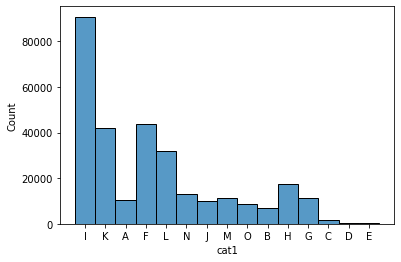

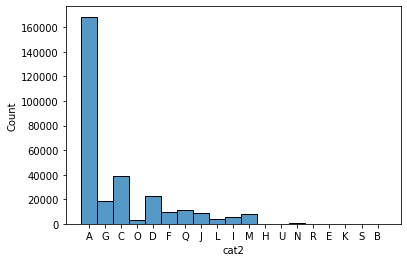

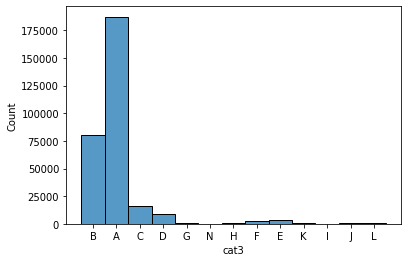

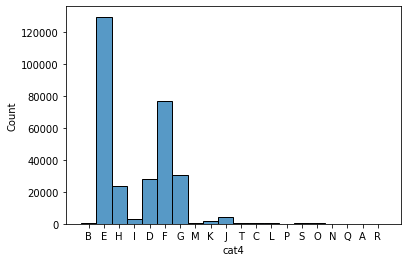

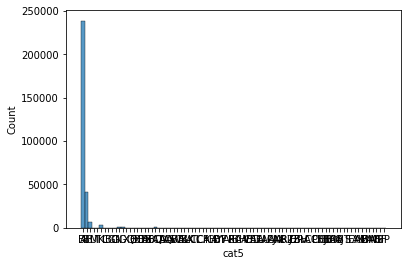

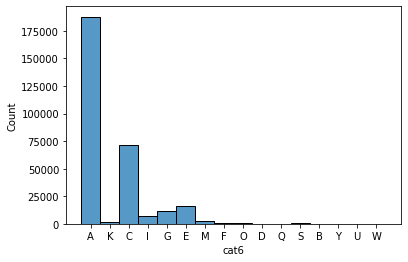

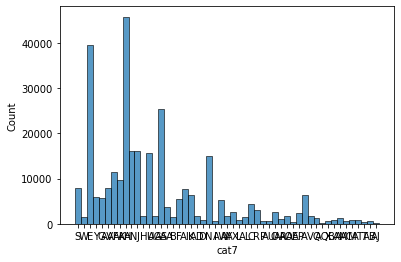

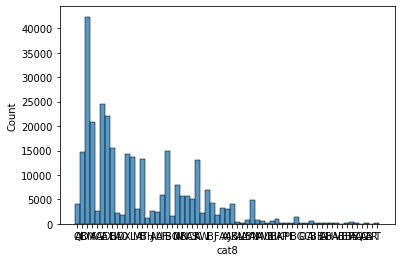

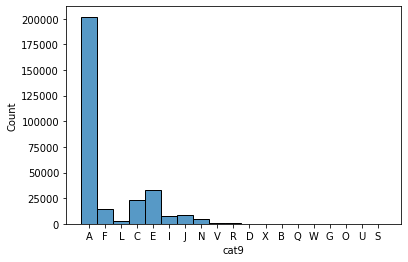

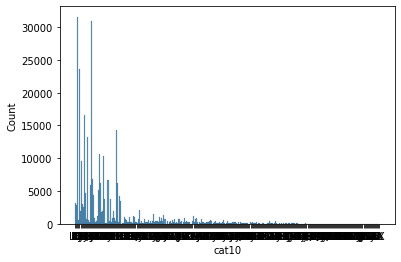

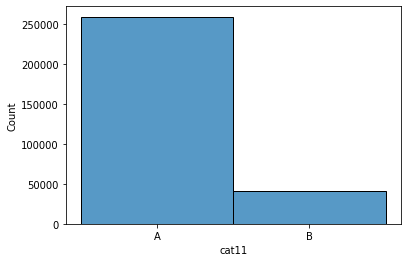

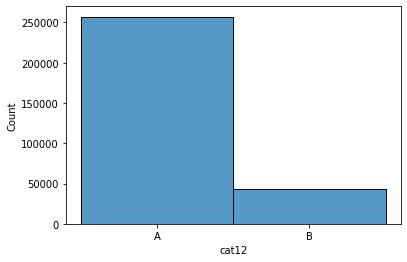

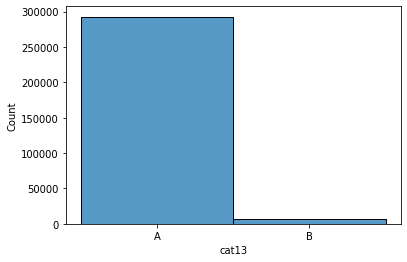

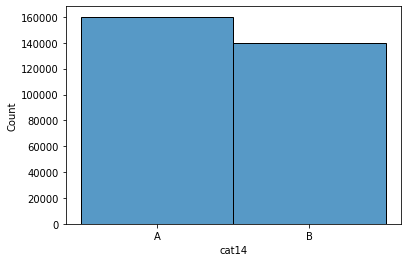

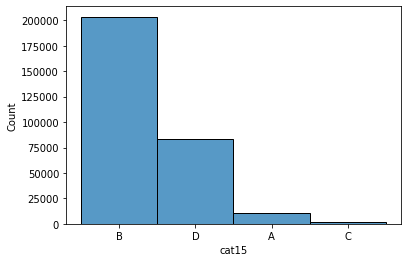

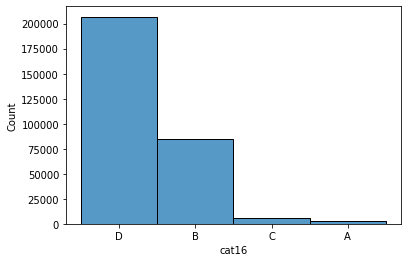

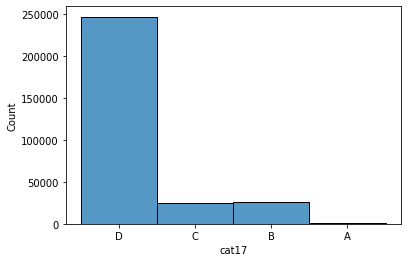

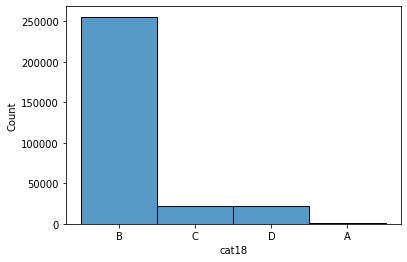

In [9]:
### DATA INSPECTION OF CATEGORICAL FEATURES
for column in col_cat:
    sns.histplot(df[column])
    plt.show()

### dimensionality should be reduced > some features have long tails

## Dataset summary

* We have a dataset of 300,000 rows and 37 features
* 19 features are categorical, 11 are numerical
* thte categorical features have unsignificant values in the long tail
* the target is a binary classifier but is unbalanced (27/73)
* there are no null-values in the dataset

# Preprocessing

## Dataset correlations of numerical features

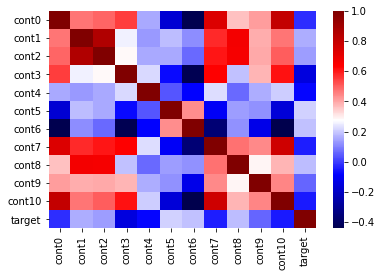

In [10]:
# Heatmap for correlations
corr = df.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        cmap= "seismic")

## high colinearity for (look out for the scale):
### cont0, cont10/cont7
### cont1, cont2
### cont2, cont8
### cont7, cont10
#### dropping these features: 'cont0', 'cont2', 'cont3', 'cont8', 'cont10'
feat_drop = ['cont0', 'cont2', 'cont3', 'cont8', 'cont10']

<AxesSubplot:>

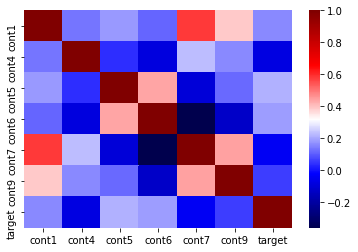

In [11]:
## dropping highly correlated feats
df_small = df.drop(columns=feat_drop)
corr = df_small.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        cmap= "seismic")

### the blue negative corrs are all below -.3 -- all should be accepted

## Removing unsignificant values in categorical features

In [12]:
## easy approach, cut all values which are not in the upper 65% of occurences
def value_rem(df=df, col_cat=col_cat, q=.65):
    for column in col_cat:
        ## creating dict of value counts for each feature
        print(column)
        d_ = df[column].value_counts()
#         print(f"Selected quantile: {d_.quantile(q=q)}")
        for k, v in dict(d_).items():
#             print(f"value: {k}, count: {v}")
            if v < d_.quantile(q=q):
                df[column] = df[column].replace(k, "other")
#                 print(f"replaced value: {k}")
    return df

In [13]:
df_small_all = value_rem(df=df_small)

cat0
cat1
cat2
cat3
cat4
cat5
cat6
cat7
cat8
cat9
cat10
cat11
cat12
cat13
cat14
cat15
cat16
cat17
cat18


In [14]:
uniques = {}
for i, col in enumerate(col_cat):
    uniques[col] = list(df_small_all[col].unique())

In [15]:
uniques

{'cat0': ['A', 'other'],
 'cat1': ['I', 'K', 'other', 'F', 'L', 'H'],
 'cat2': ['A', 'G', 'C', 'other', 'D', 'F', 'Q', 'J'],
 'cat3': ['B', 'A', 'C', 'D', 'other', 'E'],
 'cat4': ['other', 'E', 'H', 'I', 'D', 'F', 'G', 'J'],
 'cat5': ['BI',
  'AB',
  'BU',
  'M',
  'T',
  'K',
  'L',
  'other',
  'BG',
  'CI',
  'N',
  'G',
  'BO',
  'BA',
  'BQ',
  'CA',
  'D',
  'AQ',
  'AW',
  'AL',
  'BK',
  'AT',
  'CL',
  'I',
  'AY',
  'F',
  'R',
  'BC',
  'AE',
  'BV',
  'BS'],
 'cat6': ['A', 'other', 'C', 'I', 'G', 'E', 'M'],
 'cat7': ['S',
  'other',
  'E',
  'Y',
  'G',
  'AV',
  'AF',
  'AK',
  'AH',
  'AN',
  'J',
  'U',
  'AS',
  'F',
  'AI',
  'K',
  'N',
  'AW',
  'A'],
 'cat8': ['Q',
  'AD',
  'BM',
  'Y',
  'other',
  'AE',
  'AX',
  'H',
  'X',
  'L',
  'AT',
  'AF',
  'S',
  'N',
  'AN',
  'BC',
  'AS',
  'K',
  'I',
  'BJ',
  'A',
  'AK',
  'BN'],
 'cat9': ['A', 'F', 'other', 'C', 'E', 'I', 'J', 'N'],
 'cat10': ['LO',
  'HJ',
  'DJ',
  'KV',
  'DP',
  'GE',
  'HQ',
  'HC',
  'EK',

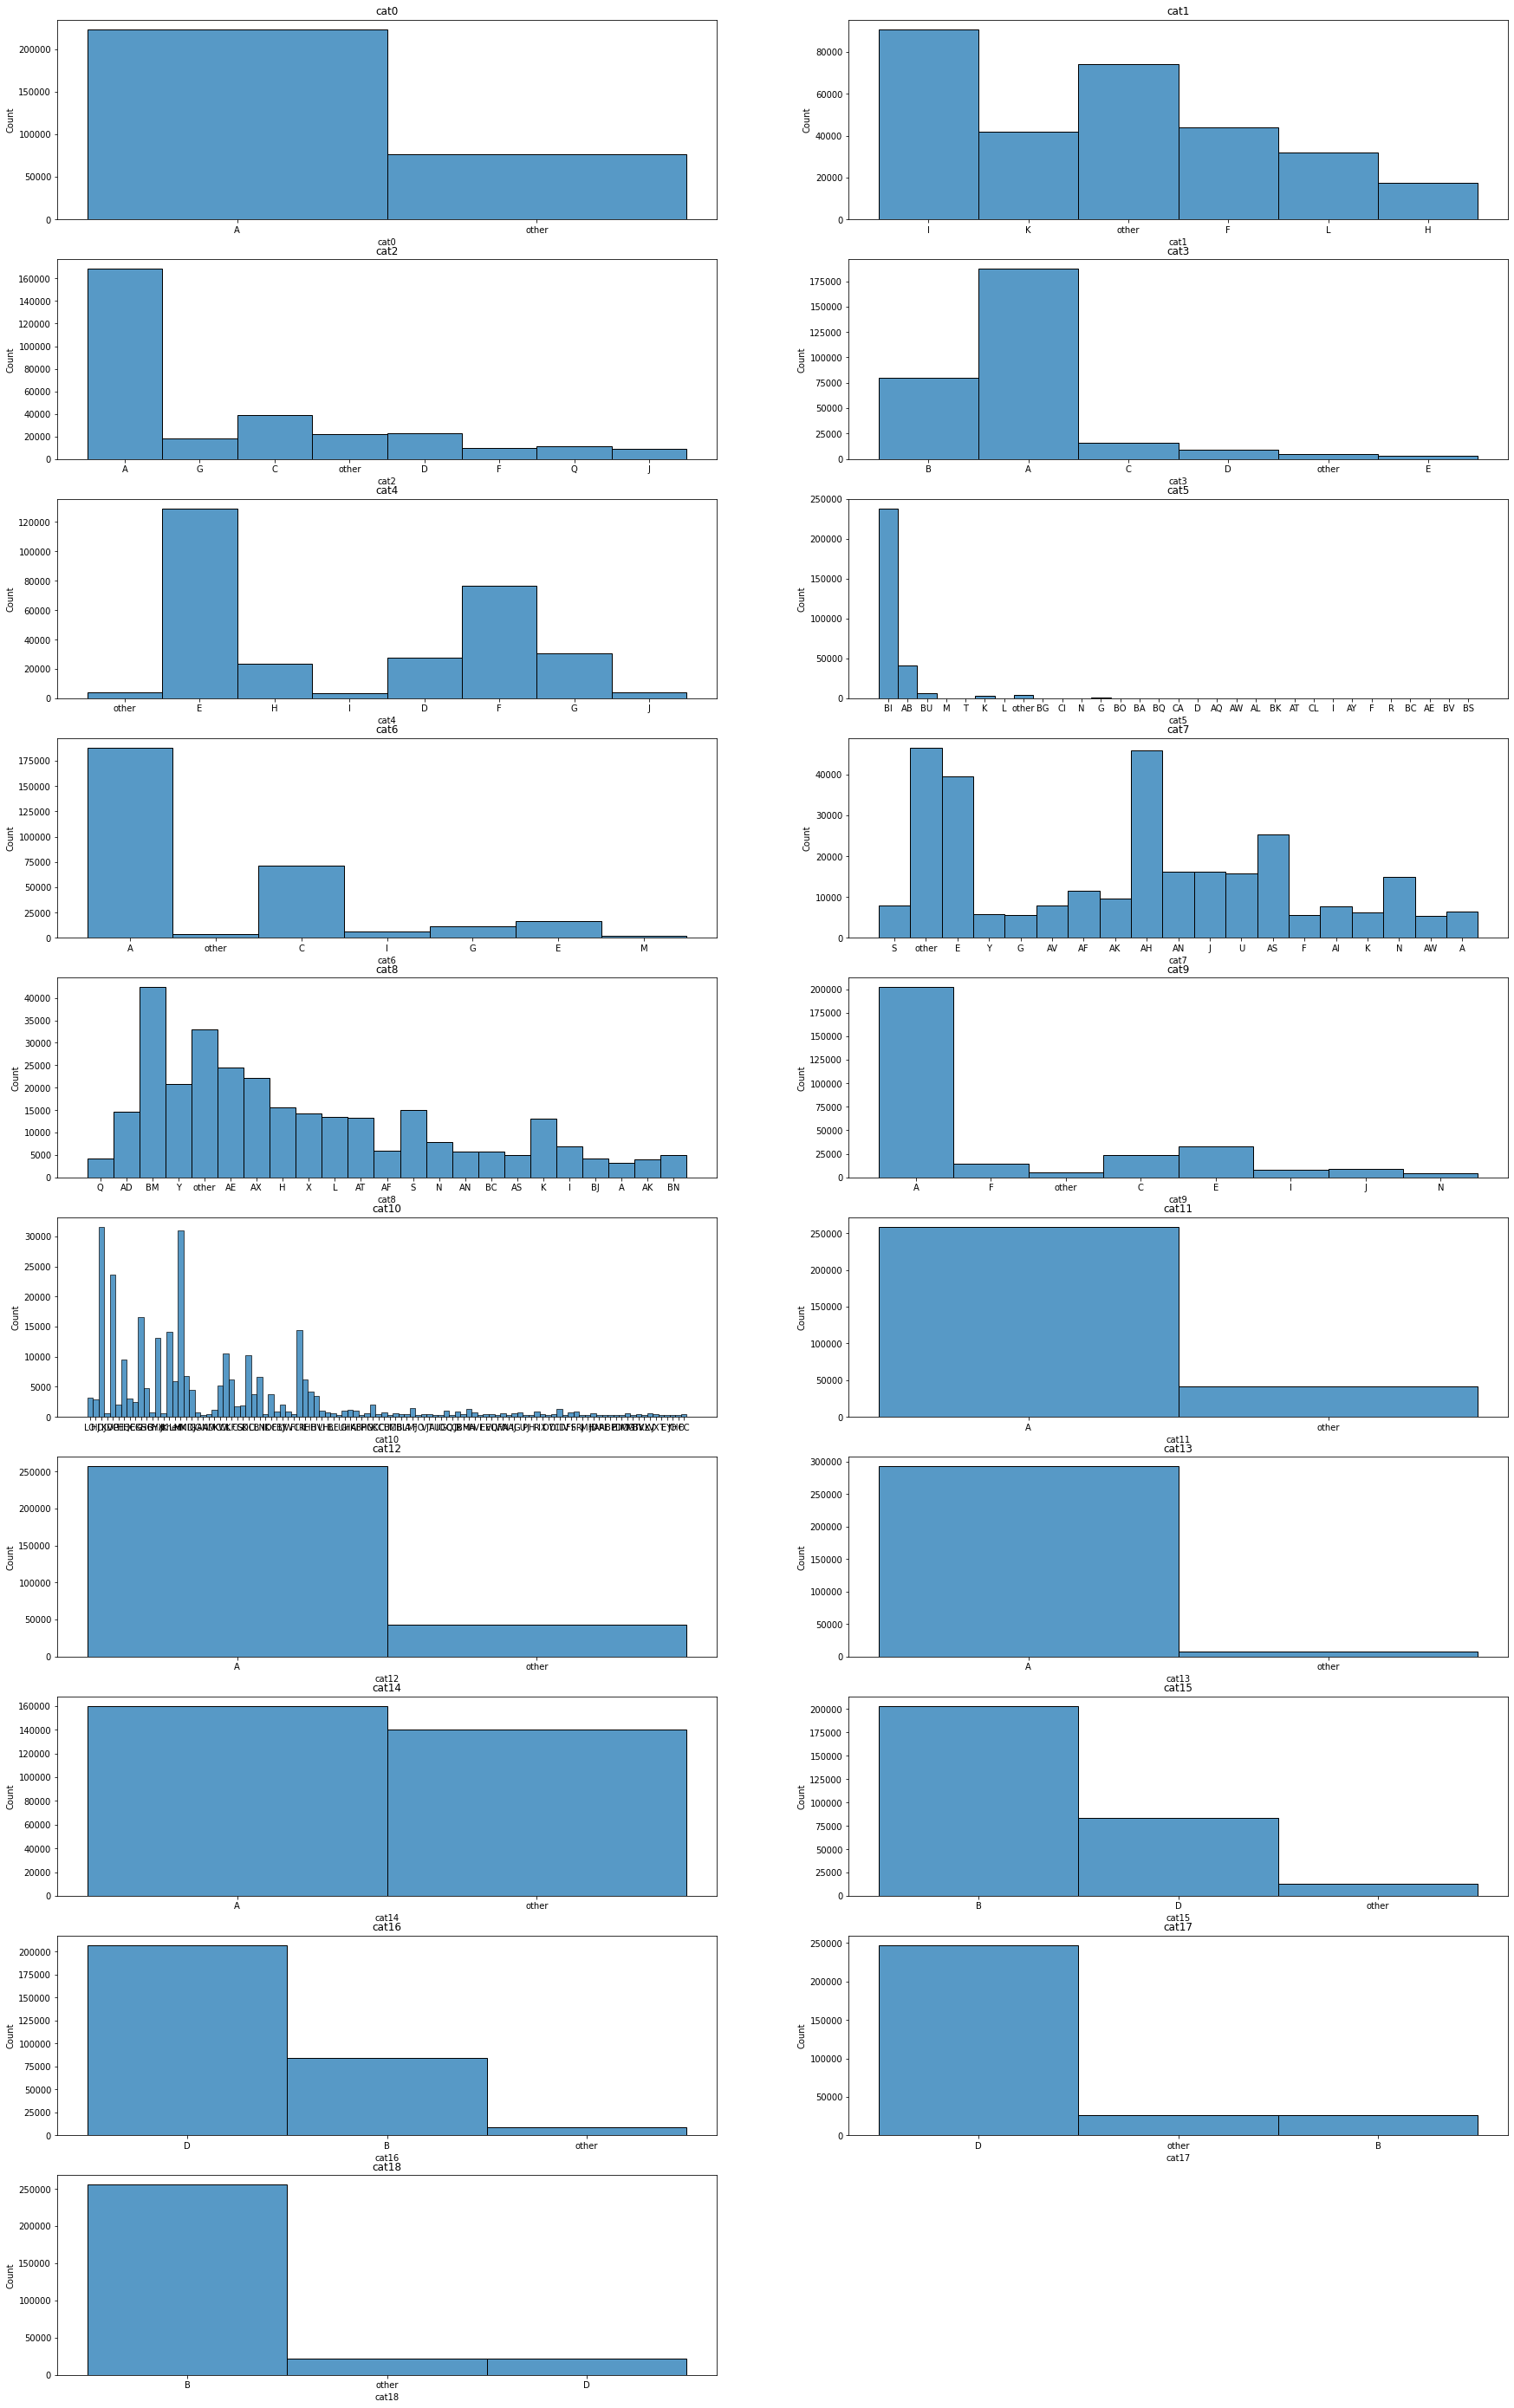

In [16]:
## see results
plt.figure(figsize=(30,50))
for count, column in enumerate(col_cat):
    count += 1 
    plt.subplot(10,2,count)
    sns.histplot(df_small[column])
#     print(df_small[column].value_counts())
    plt.title(column)


## Encoding Categorical Features

In [17]:
## splitting before encoding
X = df_small_all.drop(columns="target")
y = df_small_all.target
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.3, random_state=1)

In [18]:
### OneHotEncoder for cat vals // ordinal encoding does not apply since the vlaue of the cats is unknown
cat_transformer = OneHotEncoder(handle_unknown='ignore')

In [19]:
## DEFINE PREPROCESSOR only on cat columns
preprocessor = ColumnTransformer([('cat_transformer', cat_transformer, col_cat)], remainder="passthrough")

In [20]:
X_train = preprocessor.fit_transform(X_train)

In [21]:
## to inspect the encoded df we need to get the generated column names
columns = preprocessor.get_feature_names()
# len(columns)

In [22]:
## concatenating df with feature names
X_train = pd.DataFrame(X_train.toarray(), columns=columns)

In [23]:
X_train.shape

(210000, 250)

## Balancing Data

**f1 score for simple logistic regression:**
* without resampling 0.67
* score with resampling SMOTE 0.79

Therefore we should further work with balanced data

In [24]:
from imblearn.over_sampling import SMOTE
X_resampled, y_resampled = SMOTE().fit_resample(X_train, y_train)

In [25]:
X_resampled.shape
## there are 98 634 more rows in the resampled train data

(308634, 250)

# Models

Other options to explore:
- change the threshold of surpassed 1 or 0 -> ```probs = model.predict_proba(X)```. Then only 'translate' the predicted targets if their probability is higher than a certrain 'threshold'. 
- other estimators w/ varying hyperparams on GridSearcher

## Baseline

In [26]:
count_1 = df['target'].value_counts()[1]
count_0 = df['target'].value_counts()[0]
observations = df.shape[0]

In [27]:
## accuracy
bl_precision = count_0/observations
## recall
bl_recall = count_0/count_0

In [28]:
## F1 Score
'''2*((precision*recall)/(precision+recall))'''
bl_f1 = 2*((bl_precision*bl_recall)/(bl_precision+bl_recall))

In [29]:
bl_f1

0.8473486136485451

## Simple Logistic Regression

In [30]:
# model_log = LogisticRegression(max_iter=1000)

In [31]:
# cv_results = cross_validate(model_log,#
#                             X_resampled,
#                             y_resampled,
#                            scoring="f1",
#                            )

In [32]:
# cv_results
## score without resampling 0.67
## score with resampling SMOTE 0.79

In [33]:
# model_log.fit(X_resampled, y_resampled)

## Random forest model

In [34]:
# random forest model
from sklearn.ensemble import RandomForestClassifier

model_forest = RandomForestClassifier()
cv_results_forest = cross_validate(model_forest,
                            X_resampled,
                            y_resampled,
                           scoring="f1",
                           )


In [35]:
cv_results_forest

{'fit_time': array([112.51294446, 111.38282251, 117.37389803, 110.04163146,
        108.72940516]),
 'score_time': array([3.1033988 , 2.86261392, 2.861835  , 3.78913736, 2.71355009]),
 'test_score': array([0.78959293, 0.82421428, 0.94556132, 0.94456949, 0.94506381])}

In [36]:
model_forest.fit(X_resampled, y_resampled)

RandomForestClassifier()

## Gradient boost

In [37]:
# currently doesnt work
# grid search x gradient boost
# from sklearn.ensemble import GradientBoostingRegressor
# model_boost = GradientBoostingRegressor(
#     n_estimators=100, 
#     learning_rate=0.1,
# )

# # Instanciate Grid Search
# cv_results_boost = cross_validate(model_boost,#
#                             X_resampled,
#                             y_resampled,
#                            scoring="f1",
#                            )


In [38]:
# cv_results_boost

In [39]:
# model_boost.fit(X_train, y_train)

## ROC SCORE

In [40]:
# X_val = preprocessor.transform(X_val)

In [41]:
# # stacking predictions for all three models in a dict
# y_preds = {}
# for model in [model_log, model_forest]:#, model_boost]:
# #     model.fit(X_train, y_train)
#     y_preds[model] = model.predict(X_val)

In [42]:
# from sklearn.metrics import roc_auc_score

# # Compute AUC score
# for model, pred in y_preds.items():
#     auc_score = roc_auc_score(y_val, pred)
#     print(f"AUC score {model}: {auc_score}")

# Predicting with best model

## Testset

In [43]:
## Importing the test set from kaggle
X_test = pd.read_csv("../raw_data/test.csv")

In [44]:
# X_test.id

## Preprocessing Testset

In [45]:
# dropping previous features
X_test_p = X_test.drop(columns=feat_drop).set_index("id")

In [46]:
## replace values from the testset with "other"
for i in col_cat:
    # looking for valid values in each cat feature
    lst = list(X[i].unique())
    # replacing with 'other' if val not in training set
    X_test_p[i].apply(lambda x: x if x in lst else "other")


In [47]:
X_test_p = preprocessor.transform(X_test_p)

In [48]:
X_test_p.shape

(200000, 250)

## Predicting and saving submission

In [49]:
y_pred_test = pd.DataFrame(model_forest.predict(X_test_p), index=X_test.id).rename(columns={0:"target"})

In [50]:
y_pred_test.head()

,target
id,
5,0
6,0
8,0
9,0
11,0


In [51]:
y_pred_test.to_csv("../raw_data/submission.csv")

# Saving model for production

In [52]:
## preprocessor
dump(preprocessor, '../kaggle_challenge_mar/preprocessor.joblib')

['../kaggle_challenge_mar/preprocessor.joblib']

In [53]:
## model
dump(model_forest, '../kaggle_challenge_mar/model_forest.joblib')

['../kaggle_challenge_mar/model_forest.joblib']

In [54]:
model_forest = load('../kaggle_challenge_mar/model_forest.joblib')
model_forest


RandomForestClassifier()